<a href="https://colab.research.google.com/github/ABHIjithGT/Academic-Programs-Semester-based/blob/main/s3/Data%20Science/Lab_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving iris.csv to iris (1).csv
=== Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

=== First 5 Rows ===
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5        

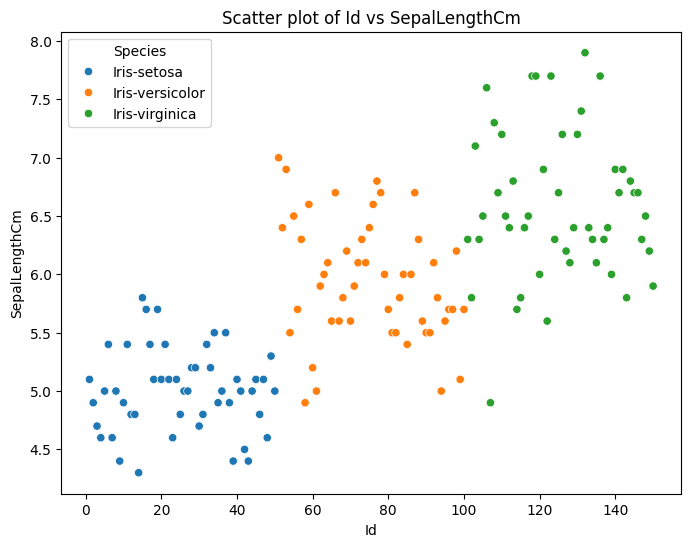

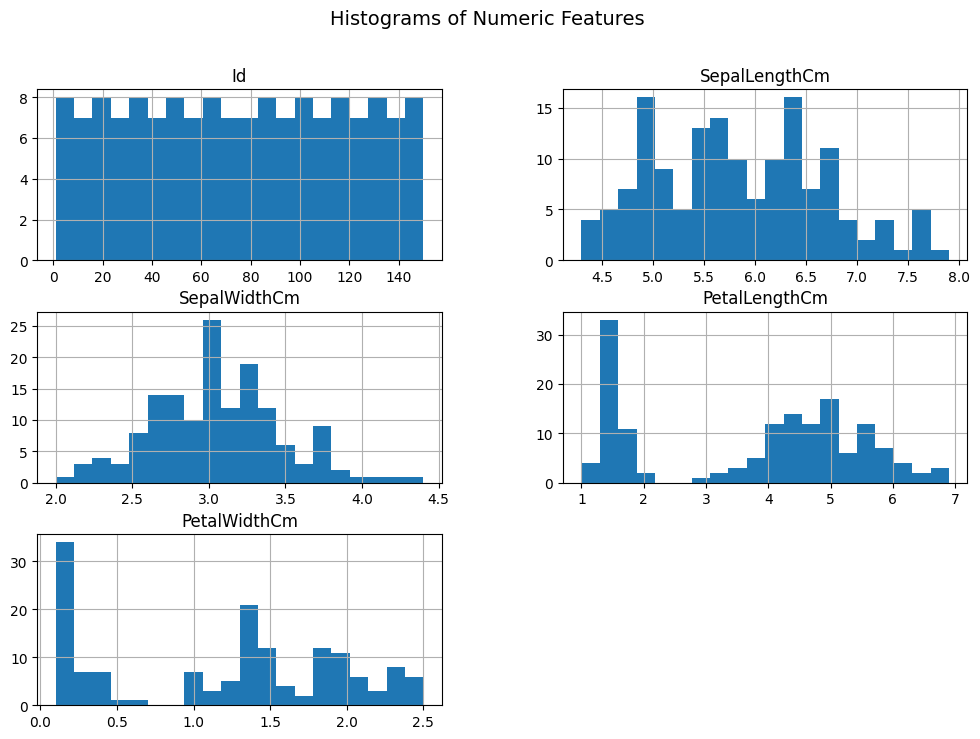

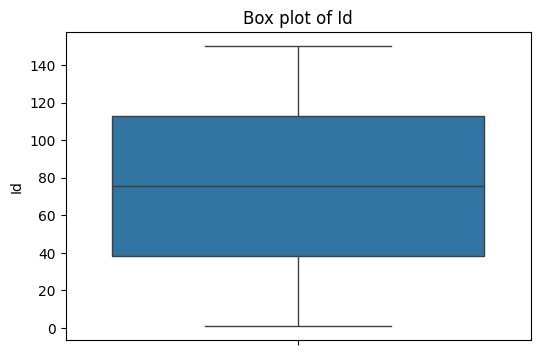

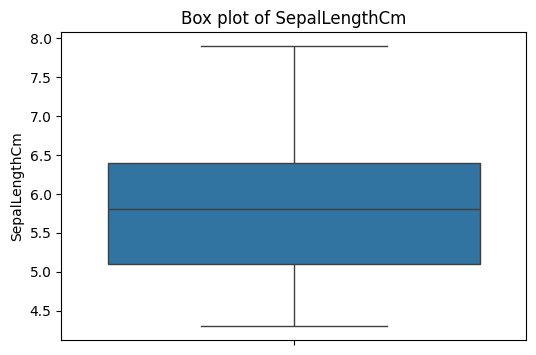

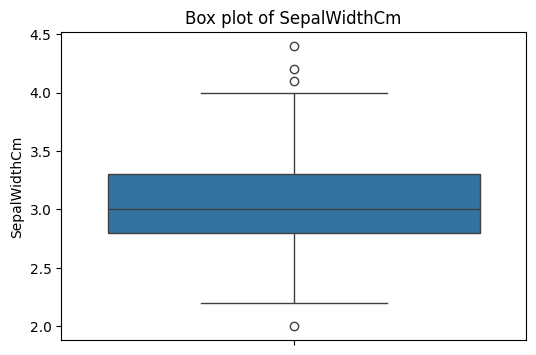

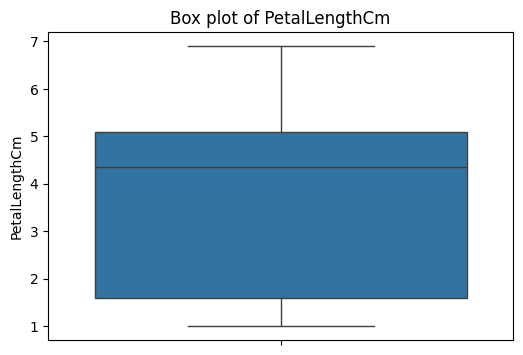

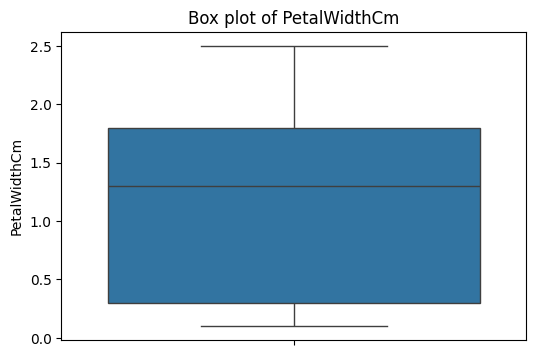

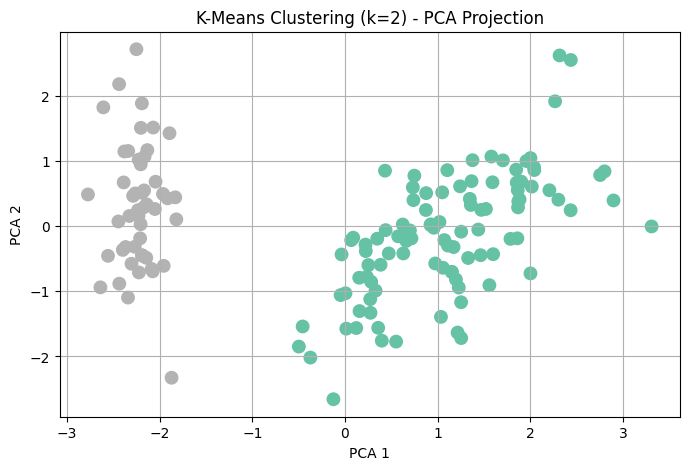

K = 2 → Approximated Accuracy: 0.6667
Silhouette Score: 0.5802
Davies–Bouldin Index: 0.5976
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]
--------------------------------------------------


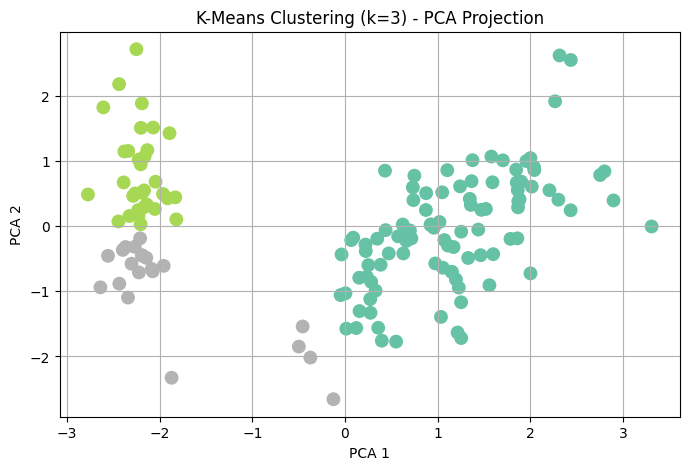

K = 3 → Approximated Accuracy: 0.6667
Silhouette Score: 0.4787
Davies–Bouldin Index: 0.7868
Confusion Matrix:
[[50  0  0]
 [ 4  0 46]
 [ 0  0 50]]
--------------------------------------------------


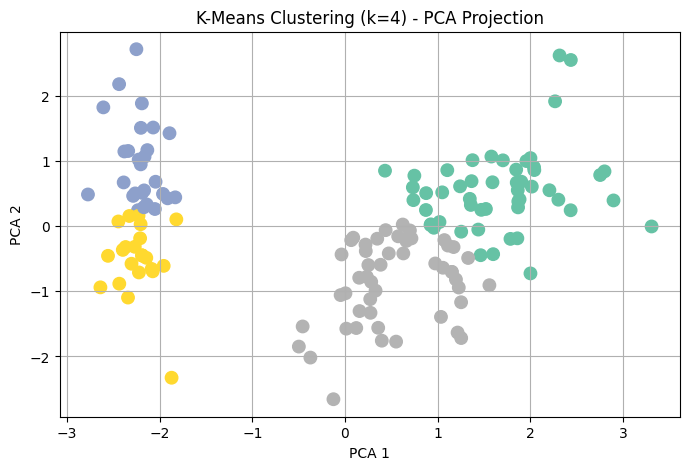

K = 4 → Approximated Accuracy: 0.8467
Silhouette Score: 0.3872
Davies–Bouldin Index: 0.8656
Confusion Matrix:
[[50  0  0]
 [ 0 38 12]
 [ 0 11 39]]
--------------------------------------------------


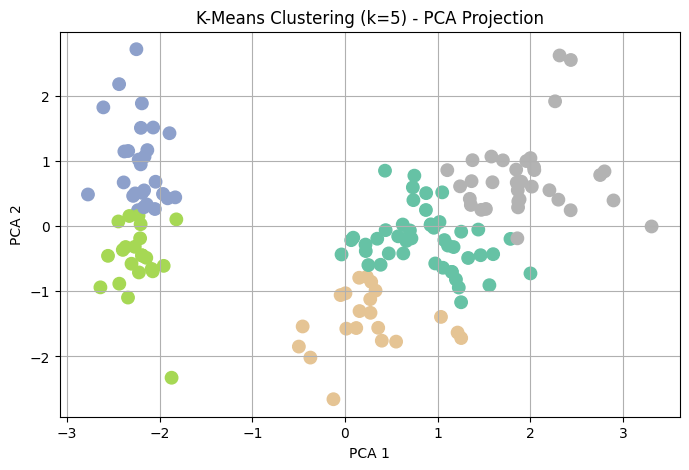

K = 5 → Approximated Accuracy: 0.8533
Silhouette Score: 0.3473
Davies–Bouldin Index: 0.9406
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0 19 31]]
--------------------------------------------------


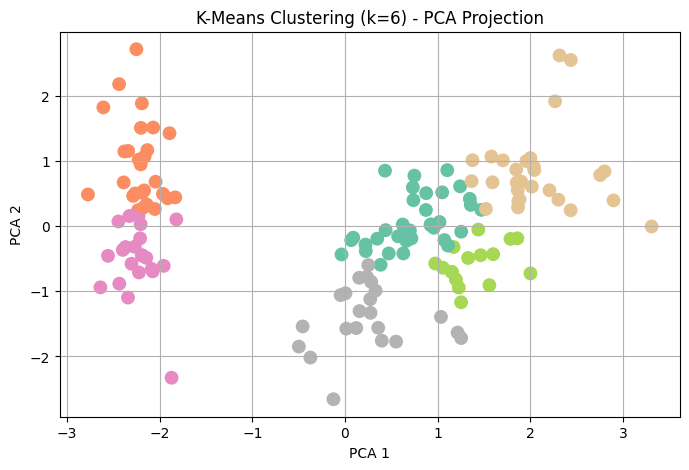

K = 6 → Approximated Accuracy: 0.9333
Silhouette Score: 0.3362
Davies–Bouldin Index: 0.9906
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  8 42]]
--------------------------------------------------


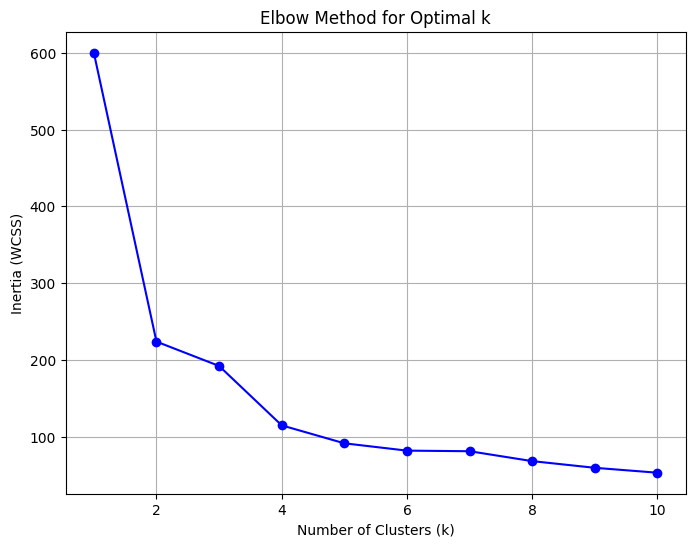

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score, davies_bouldin_score
from scipy.stats import mode
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('iris.csv')

# (i) EDA
print("=== Dataset Overview ===")
print(data.info())

print("\n=== First 5 Rows ===")
print(data.head())

print("\n=== Summary Statistics ===")
print(data.describe())

print("\n=== Missing Values ===")
print(data.isnull().sum())

# Encode species
le = LabelEncoder()
data['Species_encoded'] = le.fit_transform(data['Species'])

# (ii) Visualizations
numeric_cols = data.select_dtypes(include=[np.number]).columns[:-1]  # exclude encoded column

# Scatter plot of two features
plt.figure(figsize=(8,6))
sns.scatterplot(x=data[numeric_cols[0]], y=data[numeric_cols[1]], hue=data['Species'])
plt.title(f'Scatter plot of {numeric_cols[0]} vs {numeric_cols[1]}')
plt.show()

# Histograms
data[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Histograms of Numeric Features", fontsize=14)
plt.show()

# Box plots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# (iii) K-Means Clustering
X = data.drop(['Id', 'Species', 'Species_encoded'], axis=1, errors='ignore')
y_true = data['Species_encoded']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try K=2 to 6
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X_scaled)

    # Dimensionality reduction for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8,5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='Set2', s=80)
    plt.title(f'K-Means Clustering (k={k}) - PCA Projection')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.show()

    # Map cluster labels to true labels (approximate accuracy)
    labels = np.zeros_like(y_kmeans)
    for i in range(k):
        mask = (y_kmeans == i)
        if np.sum(mask) == 0:
            continue
        labels[mask] = mode(y_true[mask])[0]

    acc = accuracy_score(y_true, labels)
    sil_score = silhouette_score(X_scaled, y_kmeans)
    db_index = davies_bouldin_score(X_scaled, y_kmeans)

    print(f"K = {k} → Approximated Accuracy: {acc:.4f}")
    print(f"Silhouette Score: {sil_score:.4f}")
    print(f"Davies–Bouldin Index: {db_index:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, labels))
    print("-" * 50)

# (iv) Elbow Method for Optimal k
inertias = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_range, inertias, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()


Saving iris.csv to iris (8).csv


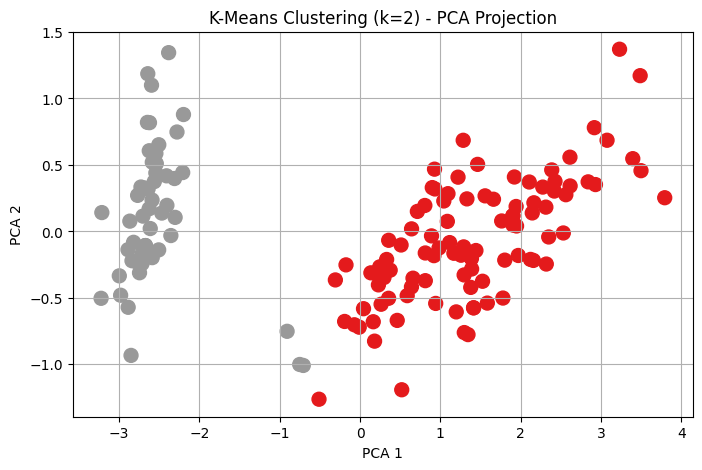

K = 2 → Approximated Accuracy: 0.6667
Confusion Matrix:
[[50  0  0]
 [ 3  0 47]
 [ 0  0 50]]
----------------------------------------


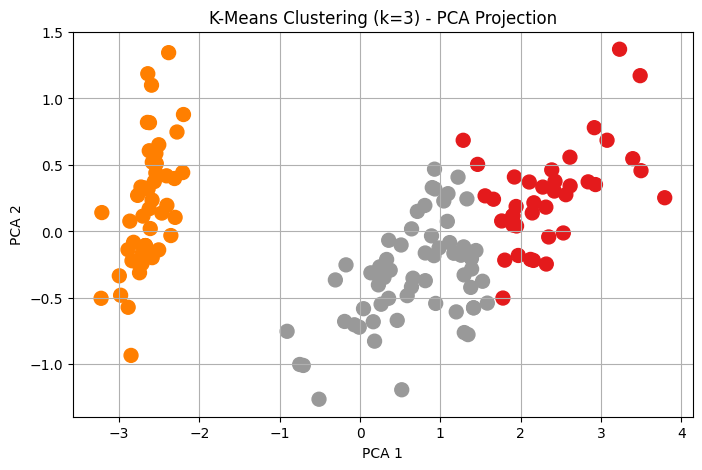

K = 3 → Approximated Accuracy: 0.8867
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]
----------------------------------------


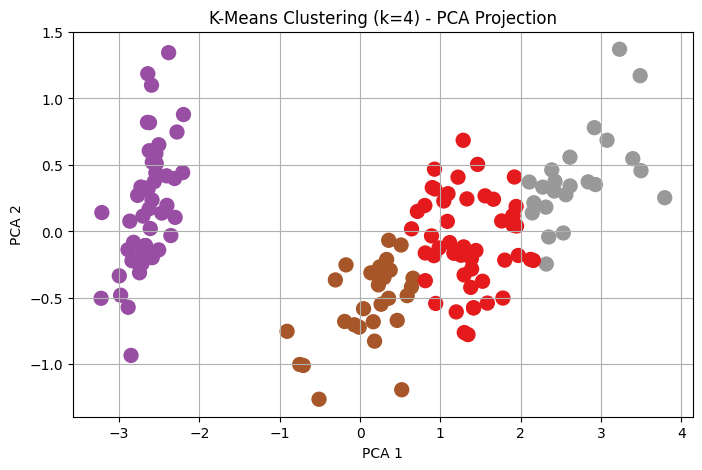

K = 4 → Approximated Accuracy: 0.8400
Confusion Matrix:
[[50  0  0]
 [ 0 27 23]
 [ 0  1 49]]
----------------------------------------


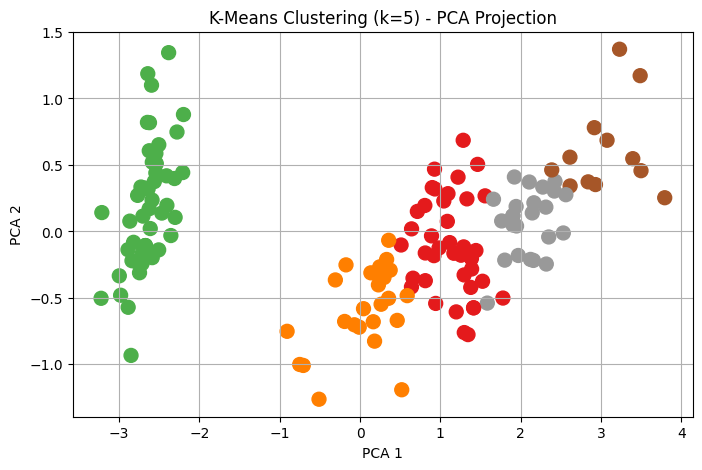

K = 5 → Approximated Accuracy: 0.9067
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0 14 36]]
----------------------------------------


In [ ]:
# Required Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('iris.csv')  # Change filename if needed

# Prepare features for clustering (drop Id and Species)
X = data.drop(['Id', 'Species'], axis=1)

# Encode true species labels to numeric
le = LabelEncoder()
y_true = le.fit_transform(data['Species'])

# Run K-Means clustering with different values of K
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Use PCA to reduce data to 2D for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Plot the clusters
    plt.figure(figsize=(8, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='Set1', s=100)
    plt.title(f'K-Means Clustering (k={k}) - PCA Projection')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.show()

    # Map cluster labels to true labels to estimate accuracy
    labels = np.zeros_like(y_kmeans)
    for i in range(k):
        mask = (y_kmeans == i)
        if np.sum(mask) == 0:
            continue
        labels[mask] = mode(y_true[mask])[0]

    acc = accuracy_score(y_true, labels)
    print(f"K = {k} → Approximated Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, labels))
    print('-' * 40)


Saving iris.csv to iris (5).csv
First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Summary statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000


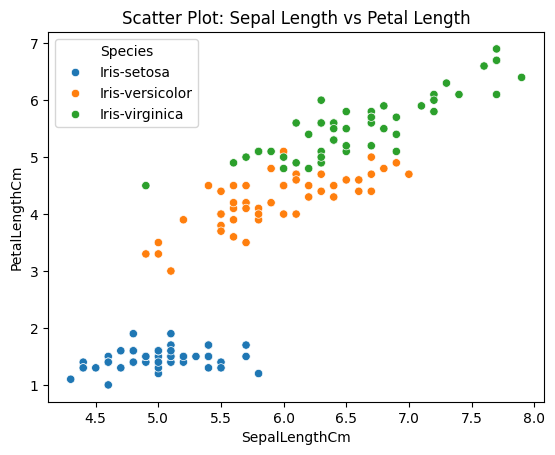

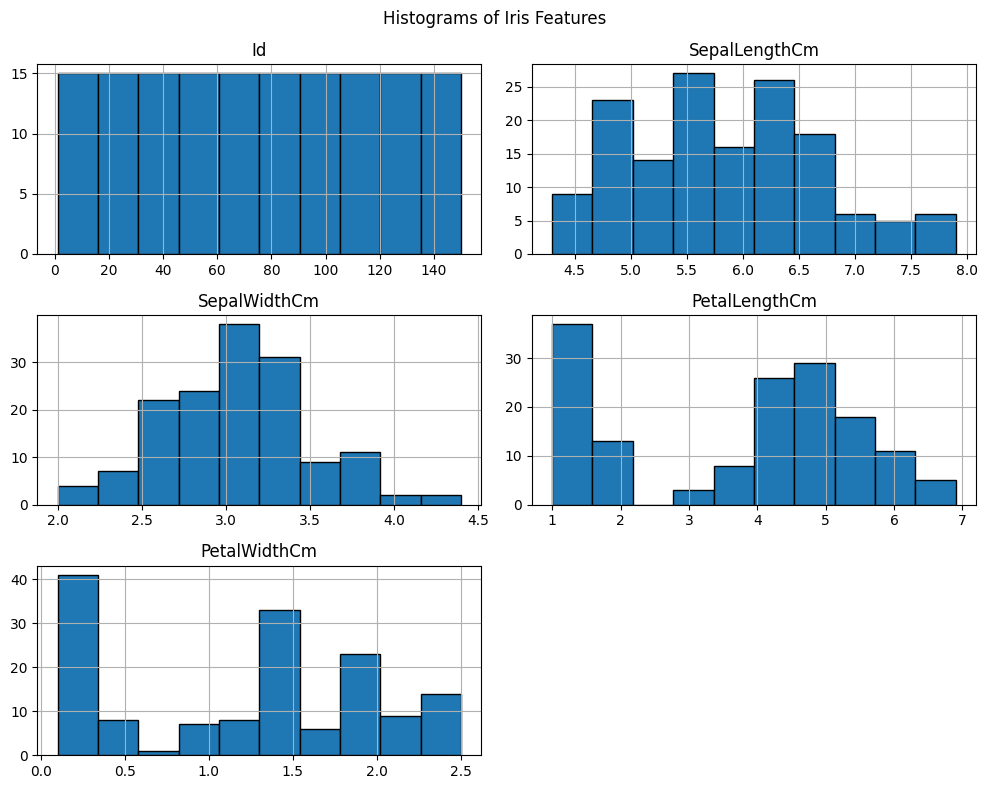

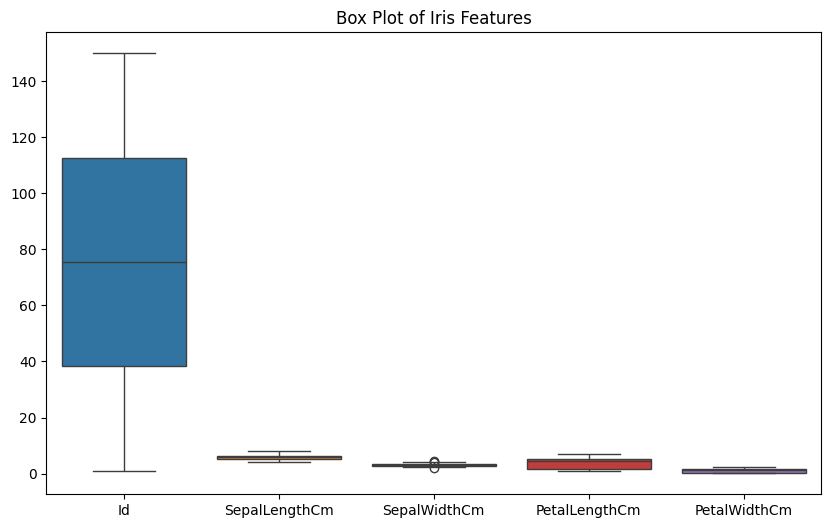

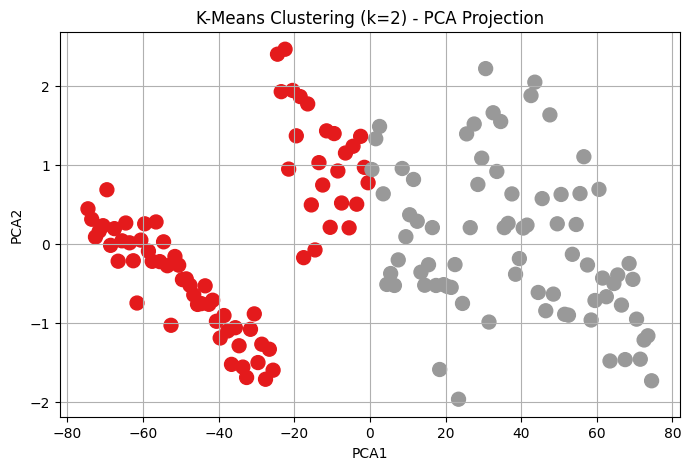

K = 2 → Approximated Accuracy: 0.6667
Confusion Matrix:
[[50  0  0]
 [25  0 25]
 [ 0  0 50]]
----------------------------------------


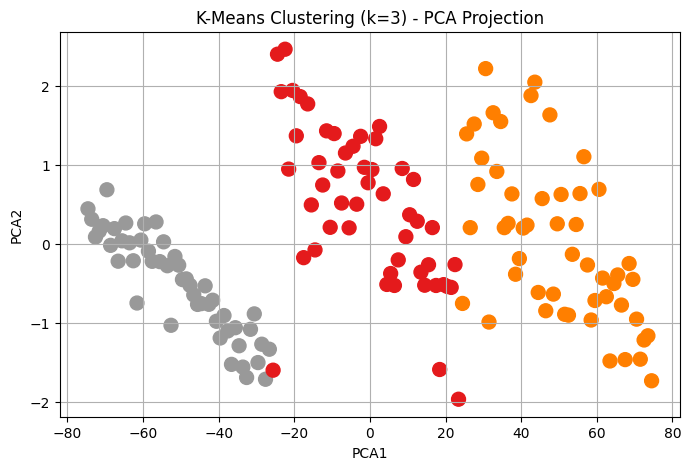

K = 3 → Approximated Accuracy: 0.9867
Confusion Matrix:
[[49  1  0]
 [ 0 49  1]
 [ 0  0 50]]
----------------------------------------


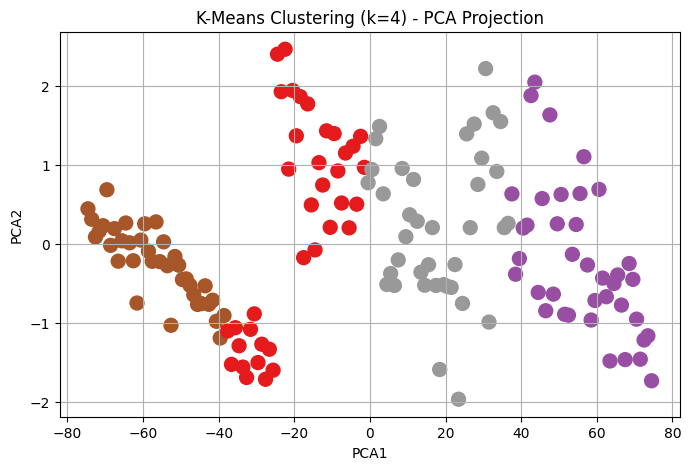

K = 4 → Approximated Accuracy: 0.8333
Confusion Matrix:
[[37 13  0]
 [ 0 50  0]
 [ 0 12 38]]
----------------------------------------


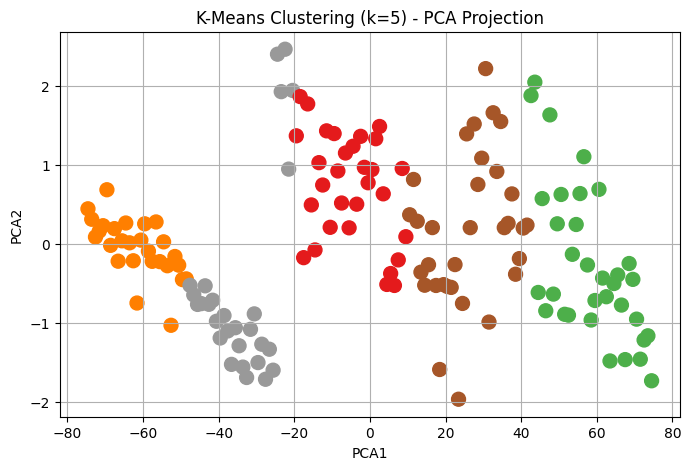

K = 5 → Approximated Accuracy: 0.8667
Confusion Matrix:
[[50  0  0]
 [ 5 30 15]
 [ 0  0 50]]
----------------------------------------


In [ ]:
# Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from google.colab import files
import numpy as np

# Upload the CSV file
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('iris.csv')

# ---------------------------
# (i) Exploratory Data Analysis (EDA)
# ---------------------------
print("First 5 rows of the dataset:")
print(data.head())

print("\nSummary statistics:")
print(data.describe())

print("\nChecking for null values:")
print(data.isnull().sum())

print("\nClass distribution:")
print(data['Species'].value_counts())

# ---------------------------
# (ii) Visualizations
# ---------------------------

# 1. Scatter Plot (sepal length vs petal length)
sns.scatterplot(data=data, x='SepalLengthCm', y='PetalLengthCm', hue='Species')
plt.title('Scatter Plot: Sepal Length vs Petal Length')
plt.show()

# 2. Histogram
data.hist(figsize=(10, 8), edgecolor='black')
plt.suptitle("Histograms of Iris Features")
plt.tight_layout()
plt.show()

# 3. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop('Species', axis=1))
plt.title('Box Plot of Iris Features')
plt.show()

# ---------------------------
# (iii) K-Means Clustering
# ---------------------------

# Prepare data for clustering
X = data.drop('Species', axis=1)

# Encode true labels to compare later
le = LabelEncoder()
y_true = le.fit_transform(data['Species'])

# Try different values of K
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Plot clusters
    plt.figure(figsize=(8, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='Set1', s=100)
    plt.title(f'K-Means Clustering (k={k}) - PCA Projection')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.grid(True)
    plt.show()

    # Accuracy estimation: matching clusters to actual classes (unsupervised, so not 100% direct)
    # Use Hungarian algorithm or best cluster match
    from scipy.stats import mode

    labels = np.zeros_like(y_kmeans)
    for i in range(k):
        mask = (y_kmeans == i)
        if np.sum(mask) == 0:
            continue
        labels[mask] = mode(y_true[mask])[0]

    acc = accuracy_score(y_true, labels)
    print(f"K = {k} → Approximated Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, labels))
    print('-' * 40)
